In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Linear Regression

Compare relationship between market value & total rooms vs average market value & total rooms

# Load and Study the Data

In [3]:
# File to Load 
file_to_load = "../dataset/2017nat_housing_survey1.csv"

# Read Purchasing File and store into Pandas data frame
housing_data = pd.read_csv(file_to_load)
housing_data.head(10)

,CONTROL,YRBUILT,UNITSIZE,NHQSCHOOL,TOTROOMS,NHQSCRIME,LOTSIZE,RATINGHS,RATINGNH,PORCH,BATHROOMS,BEDROOMS,BLD,MARKETVAL,OMB13CBSA
0,11000001,2000,6.0,1.0,8,2.0,2.0,10.0,10.0,1,4,3,2,307811.0,37980
1,11000002,1970,8.0,1.0,7,2.0,7.0,10.0,10.0,1,4,3,3,1005540.0,99998
2,11000005,1970,6.0,1.0,8,2.0,5.0,8.0,8.0,1,5,4,2,229992.0,99998
3,11000006,1980,4.0,1.0,5,2.0,3.0,10.0,10.0,1,3,3,2,132220.0,99998
4,11000007,1960,7.0,2.0,8,2.0,2.0,7.0,7.0,1,4,4,2,271584.0,37980
5,11000008,1919,3.0,NaN,5,NaN,NaN,7.0,7.0,2,1,1,9,NaN,99998
6,11000009,1970,5.0,NaN,6,NaN,2.0,NaN,NaN,1,3,3,2,877854.0,99998
7,11000010,1970,3.0,1.0,7,1.0,3.0,8.0,8.0,1,2,3,2,NaN,99998
8,11000012,1960,2.0,1.0,3,1.0,NaN,3.0,2.0,1,1,1,7,NaN,99998
9,11000013,1980,8.0,1.0,8,2.0,3.0,8.0,8.0,1,4,3,2,573123.0,37980


In [4]:
# Check for NULL values
housing_data.isnull().sum()

CONTROL          0
YRBUILT          0
UNITSIZE      7857
NHQSCHOOL    14956
TOTROOMS         0
NHQSCRIME    11086
LOTSIZE      21459
RATINGHS     10809
RATINGNH     10889
PORCH            0
BATHROOMS        0
BEDROOMS         0
BLD              0
MARKETVAL    26801
OMB13CBSA        0
dtype: int64

In [5]:
# Ignore rows where there is no market values
housing_data = housing_data.dropna()

In [6]:
# Number of records in the original dataset
len(housing_data.index)

27095

In [7]:
X = housing_data['TOTROOMS'].values.reshape(-1,1)
y = housing_data['MARKETVAL'].values.reshape(-1,1)

print(y.shape)


(27095, 1)


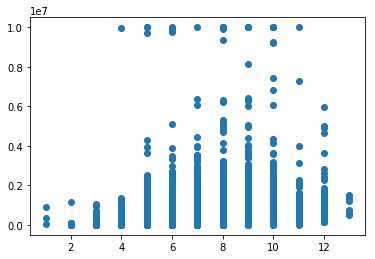

In [8]:
plt.scatter(X, y)

In [9]:
# Calculate average market value for groups
group_df = housing_data.groupby(['TOTROOMS']).agg({'MARKETVAL':'mean'})
group_df.head()

,MARKETVAL
TOTROOMS,
1,433064.333333
2,111407.937500
3,125171.921687
4,165803.044235
5,224943.506690


In [10]:
# Rename the column
group_df = group_df.rename(columns = {'MARKETVAL':'MARKETVAL_AVG'})

In [11]:
# Merget to include this new column
new_data_df = pd.merge(housing_data, group_df, on='TOTROOMS')
new_data_df.head(10)

,CONTROL,YRBUILT,UNITSIZE,NHQSCHOOL,TOTROOMS,NHQSCRIME,LOTSIZE,RATINGHS,RATINGNH,PORCH,BATHROOMS,BEDROOMS,BLD,MARKETVAL,OMB13CBSA,MARKETVAL_AVG
0,11000001,2000,6.0,1.0,8,2.0,2.0,10.0,10.0,1,4,3,2,307811.0,37980,445403.051897
1,11000005,1970,6.0,1.0,8,2.0,5.0,8.0,8.0,1,5,4,2,229992.0,99998,445403.051897
2,11000007,1960,7.0,2.0,8,2.0,2.0,7.0,7.0,1,4,4,2,271584.0,37980,445403.051897
3,11000013,1980,8.0,1.0,8,2.0,3.0,8.0,8.0,1,4,3,2,573123.0,37980,445403.051897
4,11000064,1990,7.0,1.0,8,2.0,4.0,9.0,9.0,1,4,4,2,359020.0,37980,445403.051897
5,11000075,1919,4.0,1.0,8,1.0,1.0,8.0,5.0,2,4,5,3,40633.0,37980,445403.051897
6,11000126,1980,7.0,1.0,8,2.0,2.0,9.0,9.0,1,4,3,2,462599.0,47900,445403.051897
7,11000135,1990,8.0,2.0,8,2.0,1.0,7.0,7.0,1,4,5,2,905093.0,47900,445403.051897
8,11000167,1960,7.0,1.0,8,2.0,2.0,7.0,7.0,2,4,4,2,5154904.0,47900,445403.051897
9,11000182,1960,5.0,1.0,8,2.0,5.0,8.0,10.0,1,4,4,2,45063.0,99998,445403.051897


In [12]:
X_avg = new_data_df['TOTROOMS'].values.reshape(-1,1)
y_avg = new_data_df['MARKETVAL_AVG'].values.reshape(-1,1)

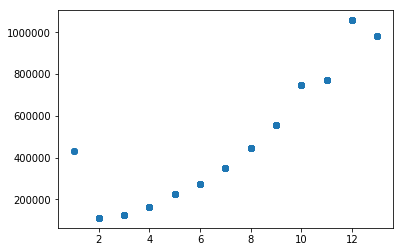

In [13]:
plt.scatter(X_avg, y_avg)

# Build the Model

Run totrooms vs marketval 

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [17]:
print('Weight coefficients (Market Value): ', model.coef_)
print('y-axis intercept (Market Value): ', model.intercept_) 
print('R2 (Market Value): ', model.score(X,y))

Weight coefficients (Market Value):  [[86117.56608449]]
y-axis intercept (Market Value):  [-226376.35181732]
R2 (Market Value):  0.08086849804393503


Run totrooms vs average market value

In [18]:

model_avg = LinearRegression()
model_avg.fit(X_avg, y_avg)
print(model_avg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [19]:
print('Weight coefficients (Average Market Value): ', model_avg.coef_)
print('y-axis intercept (Average Market Value): ', model_avg.intercept_) 
print('R2 (Average Market Value): ', model_avg.score(X_avg,y_avg))

Weight coefficients (Average Market Value):  [[86117.56608449]]
y-axis intercept (Average Market Value):  [-226376.35181733]
R2 (Average Market Value):  0.9387967518619087
